# Regresja kwantylowa

## Wyznaczanie percentylów egzaminu

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

### 1. Zrozumienie uwarunkowań

Niskie wyniki z egzaminów w ostatnich latach zmusiły naukowców do przestudiowania jak bardzo czas nauki wpływa na końcowy wynik egzaminu, porównując poszczególne percentyle. W tym celu naukowcy zebrali dane od 2000 uczniów i przeprowadzili na nich regresję kwantylową.

### 2. Zrozumienie i przygotowanie danych

Dane zawierają trzy kolumny - godziny spędzone na nauce, płeć i wynik z egzaminu. Istnieje 2000 rekordów. Nie ma żadnych niepotrzebnych danych.

In [178]:
hours = np.random.uniform(1, 10, 2000)
score = 60 + 2*hours + np.random.normal(loc=0, scale=.45*hours, size=2000)
sex = np.random.choice([0, 1], size=2000, p=[.4, .6])

In [179]:
df = pd.DataFrame({'hours': hours, 'sex': sex, 'score': score})

In [180]:
boys = df[(df.sex == 1)]
girls = df[(df.sex == 0)]

In [181]:
df.head()

,hours,sex,score
0,9.664358,1,74.812277
1,2.839745,0,64.182368
2,4.070720,1,67.717830
3,1.053093,0,61.385765
4,2.411229,1,66.524598


In [182]:
boys.head()

,hours,sex,score
0,9.664358,1,74.812277
2,4.070720,1,67.717830
4,2.411229,1,66.524598
7,5.418554,1,71.479469
8,6.182095,1,75.845962


In [183]:
girls.head()

,hours,sex,score
1,2.839745,0,64.182368
3,1.053093,0,61.385765
5,4.374259,0,67.259872
6,8.510689,0,81.256121
13,5.475137,0,69.457626


### 3. Modelowanie

Zastosowano model regresji kwantylowej, dla kwantyli 0.5, 0.75 i 0.95.
Dla każdego kwantyla po zastosowaniu modelu wyliczono trzy wartości - a, b oraz c, dzięki którym możliwe było późniejsze wyliczenie wartości odpowiednich percentyli ze wzoru a + b \* hours + c * sex, gdzie hours to liczba godzin spędzonych przy nauce, a sex to płeć (0 - kobieta, 1 - mężczyzna).
Dla przykładu, wartość 95 percentyla dla uczniów płci męskiej przeznaczających 8 godzin na naukę wynosiłaby:
M95 percyntyl = a + b * 8 + c * 1

In [184]:
quantiles = [.5, .75, .95]

In [185]:
model = smf.quantreg('score ~ hours + sex', df)

In [186]:
def fit_model(q):
    res = model.fit(q=q, max_iter = 10000)
    return [q, res.params['Intercept'], res.params['hours'], res.params['sex']]

In [187]:
models = [fit_model(x) for x in quantiles]

In [188]:
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'c'])

In [189]:
print(models)

      q          a         b         c
0  0.50  60.112733  1.959105  0.044010
1  0.75  60.011161  2.290223  0.030083
2  0.95  59.990292  2.742772 -0.079147


### 4. Ewaluacja

Wykorzystano model do zwizualizowania wyników poszczególnych percentyli, wyciągając z wykresu odpowiednie wnioski.

In [190]:
def get_cmap(n, name='copper'):
    return plt.cm.get_cmap(name, n)

In [191]:
cmap = get_cmap(len(models))

Text(0, 0.5, 'Exam Score')

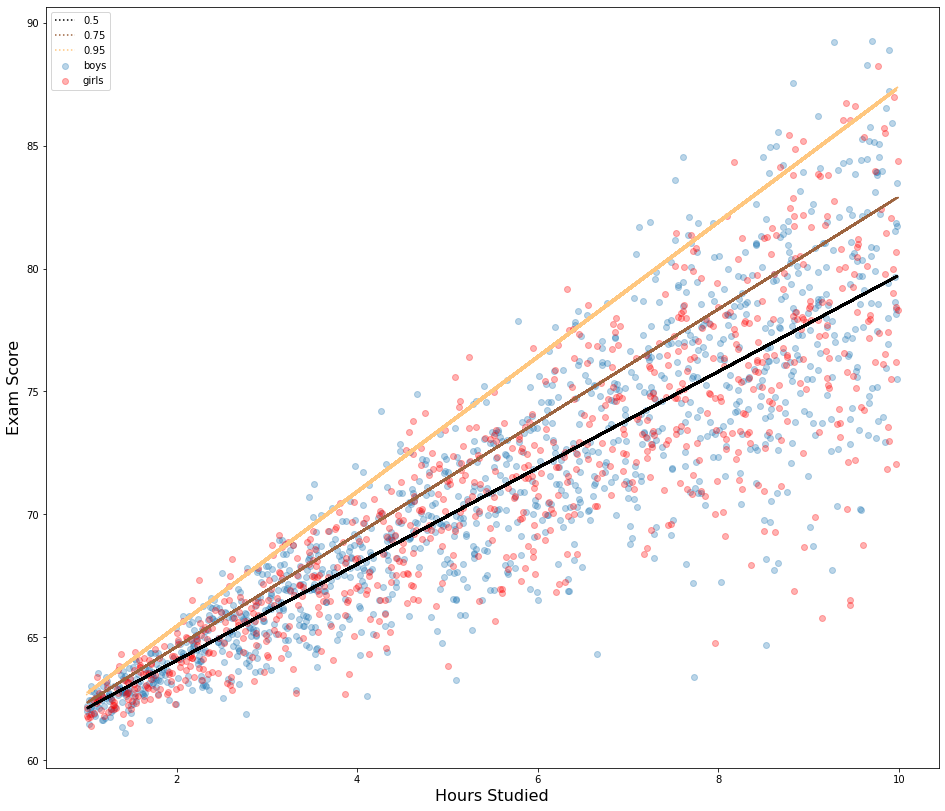

In [192]:
fig, ax = plt.subplots(figsize=(16, 14))

get_y = lambda a, b, c: a + b * hours + c * sex

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i], models.c[i])
    ax.plot(hours, y, label=round(models.q[i], 2), linestyle='dotted', color=cmap(i))

ax.scatter(boys.hours.values, boys.score.values, alpha=.3, label="boys")
ax.scatter(girls.hours.values, girls.score.values, alpha=.3, label="girls", c="red")
legend = ax.legend()
ax.set_xlabel('Hours Studied', fontsize=16)
ax.set_ylabel('Exam Score', fontsize=16)

### 5. Wdrożenie

Wyniki badania zostały wykorzystywane przy planowaniu trudności kolejnych egzaminów, do przewidywania przyszłych perecyntyli oraz do możliwych zmian w systemie nauczania.